<a href="https://colab.research.google.com/github/Angelgz011/estadistica2/blob/main/problema_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Con un coeficiente de correlación de 0.9808 se puede decir que 
los datos tienen un nivel de correlación muy fuerte 

El coeficiente  de determinación es: 0.9619, lo que nos indica que el 96.1917% de
 la variabilidad de Y tienen relación con los valores de X
Intervalo de confianza para b1 de  95%
1.4557 < b1 <  2.0194

Este intervalo de confianza nos dice que no hay evidencia para rechazar el modelo.



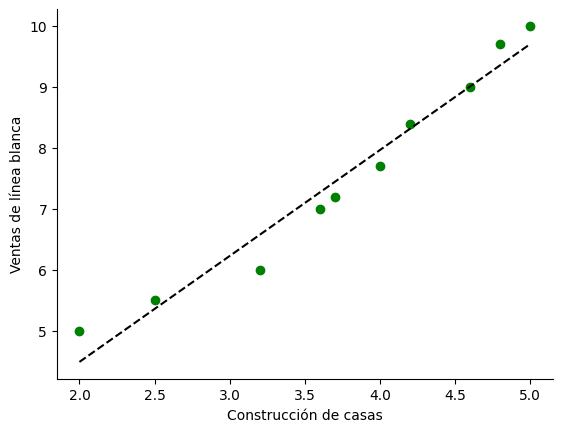

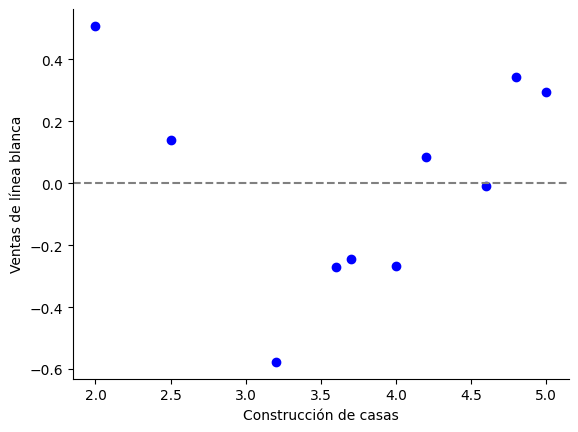

valor-p para shapiro:  0.8464

valor_p de Brausch - pagan:  0.1581.
 Esto nos indica que podemos asumir normalidad para los datos.
Para x = 4.0, el valor interpolado de  y =  7.9670

Para x = 4.8, el valor interpolado de  y =  9.3571

Para x = 7.0, el valor extrapolado de  y =  13.1797

Tabla Anova:             df     sum_sq    mean_sq           F        PR(>F)
x         1.0  25.976581  25.976581  202.069951  5.841003e-07
Residual  8.0   1.028419   0.128552         NaN           NaN
Para este ejercicio, el valor-p que obtenemos es de 0.0000005841003
 Lo que nos indica que los gastos generales tienen una fuerte relación 
 con las unidades.


In [13]:
import numpy as np
x = np.array([2.0, 2.5, 3.2, 3.6, 3.7, 4.0, 4.2, 4.6, 4.8, 5.0]) #Construcción de casas
y = np.array([5.0, 5.5, 6.0, 7.0, 7.2, 7.7, 8.4, 9.0, 9.7, 10.0]) #Ventsa de línea blanca

#3.- Realizar un diagrama de disperción
import matplotlib.pyplot as plt
plt.scatter(x, y, color = 'green')
plt.xlabel('Construcción de casas') # nombrar eje x
plt.ylabel('Ventas de línea blanca') # nombrar eje y
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Se observa una tendencia lineal clara.

#4.- Calcular el coeficiente de correlación
from scipy.stats import pearsonr
r,_= pearsonr(x,y)

print(f"Con un coeficiente de correlación de {r:0.4f} se puede decir que \nlos datos tienen un nivel de correlación muy fuerte \n")

#5.- Calcular el coeficiente de determinación
r_cuadrado = r**2
print(f"El coeficiente  de determinación es: {r_cuadrado:0.4f}, lo que nos indica que el {r_cuadrado*100:0.4f}% de\n la variabilidad de Y tienen relación con los valores de X\n")

#6.- Obtener la recta de regresión ajustada
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()
b0, b1 = modelo.params
fun = lambda x: b0 + b1 * x
Yc = fun(x)
plt.plot(x, Yc, color = 'black', linestyle = '--')
from sklearn.metrics import r2_score
r2 = r2_score(y, Yc)



#7.- Obtener un intervalo de confianza del 95%
import pandas as pd

nivel_de_confianza = 0.95
intervalo_de_confianza = pd.DataFrame(modelo.conf_int(alpha = 1 - nivel_de_confianza))
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f"Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}")
print(f"{intervalo_de_confianza_b1[0]:0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n")
print("Este intervalo de confianza nos dice que no hay evidencia para rechazar el modelo.\n")


#8.- Calcular los residuales y trasar un nuevo gráfico de disperción
plt.figure()
residuales = y - Yc
plt.scatter(x, residuales, color = 'blue')
plt.xlabel('Construcción de casas')
plt.ylabel('Ventas de línea blanca')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.show()

#Segun la gráfica, podríamos decir que si cumple con la homocedastisidad ya que no parece haber
#ningun cumulo de puntos que pueda decir lo contrario, a su vez podemos decir que cumple bien con el
#supuesto de linealidad, pues no se observa ningun patrón de curva.

#9.- PRUEBA DE SHAPIRO PARA LOS RESIDUALES
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p para shapiro: {valor_p_sh: 0.4f}\n')

#10.- Prueba de brausch-Pagan

from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan( residuales, x_constante)
print(f"valor_p de Brausch - pagan: {valor_p_bp: 0.4f}.\n Esto nos indica que podemos asumir normalidad para los datos.")

#11.-  Interpolar y extrapolar usando la recta de regresión
b0, b1 = modelo.params
x_interpolado1 = 4.0
y_interpolado1 = b0 + b1 *x_interpolado1
print(f'Para x = {x_interpolado1}, el valor interpolado de  y = {y_interpolado1: 0.4f}\n')

x_interpolado2 = 4.8
y_interpolado2 = b0 + b1 *x_interpolado2
print(f'Para x = {x_interpolado2}, el valor interpolado de  y = {y_interpolado2: 0.4f}\n')

x_extrapolado = 7.0
y_extrapolado = b0 + b1 *x_extrapolado
print(f'Para x = {x_extrapolado}, el valor extrapolado de  y = {y_extrapolado: 0.4f}\n')

#12.- TABLA ANOVA
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.DataFrame({'x': x, 'y': y})

modelo_formula = smf.ols(formula = 'y ~ x', data = df).fit()

anova = sm.stats.anova_lm(modelo_formula)
print("Tabla Anova: ", anova)
print("Para este ejercicio, el valor-p que obtenemos es de 0.0000005841003\n Lo que nos indica que los gastos generales tienen una fuerte relación \n con las unidades.")
